#1.Getting Started


##1.1 Checking GPU and installing the packages

In [ ]:
!nvidia-smi

Sun Nov 24 12:08:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
!pip install torch
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scanpy


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=6b9302f374844492156fcd820345d5e46ae3e29fc9a62c4abefd76cef68a8ac7
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


##1-2. Cloning the GitHub repository.

In [2]:
!git clone https://github.com/seul153/Spatial-TENET.git

Cloning into 'Spatial-TENET'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 113 (delta 24), reused 111 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 22.46 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# moving the data

!cp -r /content/drive/MyDrive/Spa-Visium.zip ./Spatial-TENET/Test_Data/Input/Pre/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium.zip -d ./Spatial-TENET/Test_Data/Input/Pre/

Archive:  ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium.zip
   creating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/
   creating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/GSM6177612_NYU_LIHC1_Vis_Cell2loc.h5ad  
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_positions_list.csv  
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_detected_tissue_image.jpg  
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_hires_image.png  
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_aligned_fiducials.jpg  
  inflating: ./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_lowres_image.png  
  inflating: ./Spatial-TENET

In [7]:
import os

for f in os.listdir('./Spatial-TENET/Test_Data/Input/Pre/'):
  print(f)

Spa-Visium.zip
Spy_CellToGene
Dataset
Spa-Visium


#2.Preparing the Dataset


In [9]:
# Loading required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
import seaborn as sns

%matplotlib inline

##2-1. Loading the dataset

Q. what is visium?

In [11]:
visium_dir = './Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/'
for f in os.listdir(visium_dir):
    print(f)

GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_positions_list.csv
spatial
GSM6177612_NYU_LIHC1_Vis_processed_spatial_scalefactors_json.json
GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_hires_image.png
GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_lowres_image.png
GSM6177612_NYU_LIHC1_Vis_processed_spatial_aligned_fiducials.jpg
GSM6177612_NYU_LIHC1_Vis_processed_spatial_detected_tissue_image.jpg
GSM6177612_NYU_LIHC1_Vis_processed_filtered_feature_bc_matrix.h5


##2-2. Exploring the dataset

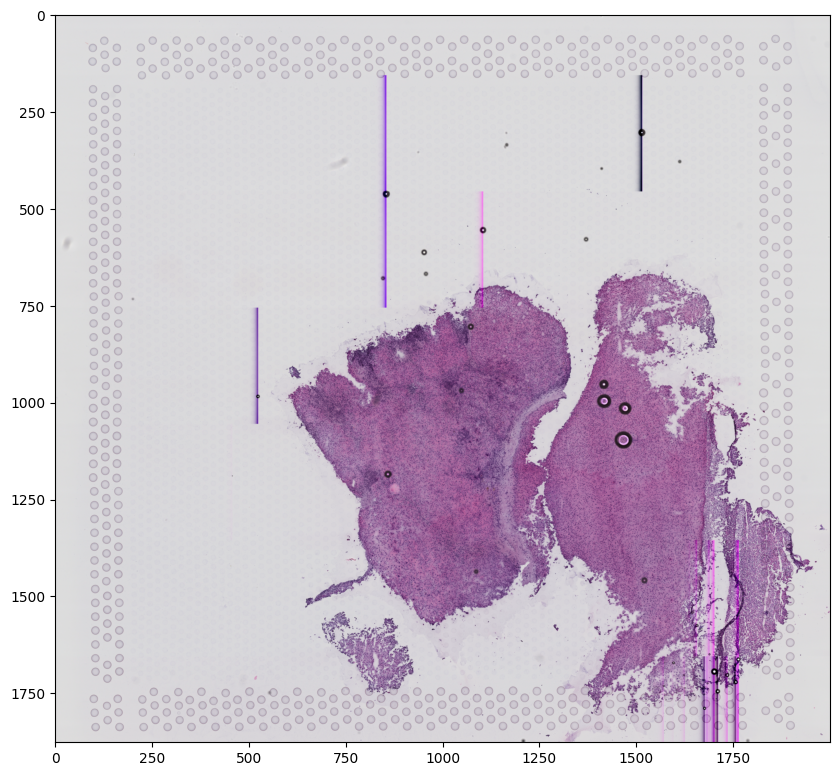

In [12]:
import matplotlib.pyplot as plt
from skimage.io import imread


# load H&E image
he_image_path = './Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/GSM6177612_NYU_LIHC1_Vis_processed_spatial_tissue_hires_image.png'
he_image = imread(he_image_path)
plt.figure(figsize=(10, 10))
plt.imshow(he_image, origin='upper')
plt.show()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


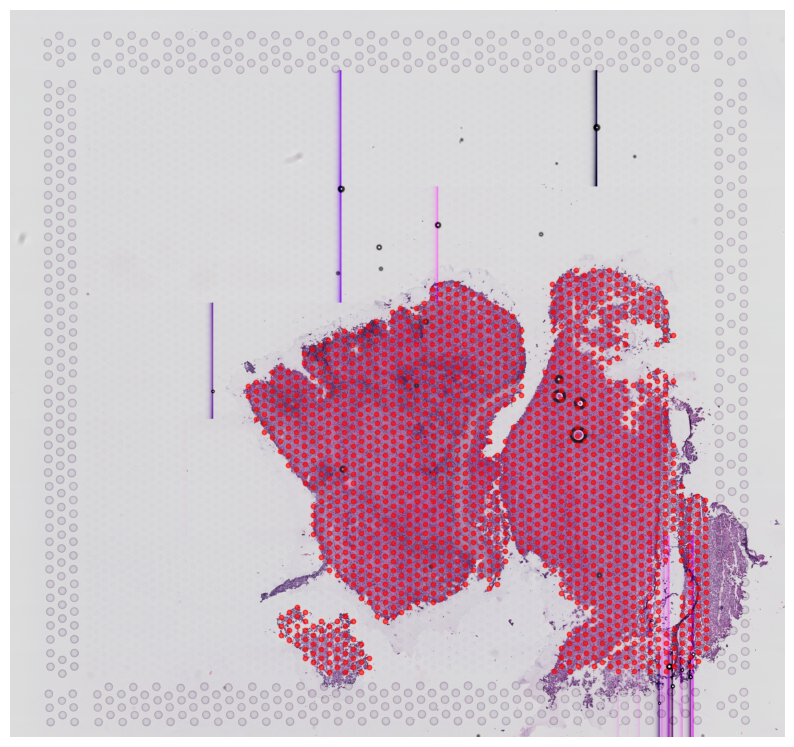

In [13]:
# H&E image added spots

import scanpy as sc
adata = sc.read_visium('./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/', count_file = 'GSM6177612_NYU_LIHC1_Vis_processed_filtered_feature_bc_matrix.h5')

# extracting Spatial coordinates
spatial_coords = adata.obsm['spatial']  # spatial
scalef = adata.uns['spatial']['LIHCHs1_1']['scalefactors']['tissue_hires_scalef']

# scaling
scaled_coords = spatial_coords * scalef

# visualization
plt.figure(figsize=(10, 10))
plt.imshow(he_image, origin='upper')
plt.scatter(scaled_coords[:, 0], scaled_coords[:, 1], c='red', s=10, alpha=0.6)
plt.axis('off')
plt.show()

In [14]:
# exporing anndata

adata = sc.read_visium('./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/Visium/', count_file = 'GSM6177612_NYU_LIHC1_Vis_processed_filtered_feature_bc_matrix.h5')
adata

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 1661 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [15]:
adata.var

gene_ids    feature_types  genome
MIR1302-2HG  ENSG00000243485  Gene Expression  GRCh38
FAM138A      ENSG00000237613  Gene Expression  GRCh38
OR4F5        ENSG00000186092  Gene Expression  GRCh38
AL627309.1   ENSG00000238009  Gene Expression  GRCh38
AL627309.3   ENSG00000239945  Gene Expression  GRCh38
...                      ...              ...     ...
AC233755.2   ENSG00000277856  Gene Expression  GRCh38
AC233755.1   ENSG00000275063  Gene Expression  GRCh38
AC240274.1   ENSG00000271254  Gene Expression  GRCh38
AC213203.1   ENSG00000277475  Gene Expression  GRCh38
FAM231C      ENSG00000268674  Gene Expression  GRCh38

[33538 rows x 3 columns]

In [16]:
adata.obs

in_tissue  array_row  array_col
AAACACCAATAACTGC-1          1         59         19
AAACAGTGTTCCTGGG-1          1         73         43
AAACCGGGTAGGTACC-1          1         42         28
AAACCGTTCGTCCAGG-1          1         52         42
AAACCTAAGCAGCCGG-1          1         65         83
...                       ...        ...        ...
TTGTTGGCAATGACTG-1          1         76         30
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27
TTGTTTGTATTACACG-1          1         73         41

[1661 rows x 3 columns]

In [17]:
adata.uns

OrderedDict([('spatial',
              {'LIHCHs1_1': {'images': {'hires': array([[[0.8666667 , 0.8666667 , 0.8666667 ],
                         [0.8666667 , 0.8666667 , 0.8745098 ],
                         [0.8666667 , 0.8666667 , 0.8745098 ],
                         ...,
                         [0.87058824, 0.87058824, 0.8784314 ],
                         [0.87058824, 0.87058824, 0.8784314 ],
                         [0.8666667 , 0.8745098 , 0.8784314 ]],
                 
                        [[0.8666667 , 0.8666667 , 0.8666667 ],
                         [0.8666667 , 0.8666667 , 0.8745098 ],
                         [0.8666667 , 0.8666667 , 0.8745098 ],
                         ...,
                         [0.8666667 , 0.8745098 , 0.87058824],
                         [0.87058824, 0.87058824, 0.8784314 ],
                         [0.87058824, 0.87058824, 0.8784314 ]],
                 
                        [[0.8666667 , 0.8666667 , 0.8745098 ],
                         [

In [18]:
adata.obsm

AxisArrays with keys: spatial

##2-2. Normalization

<https://scanpy-tutorials.readthedocs.io/en/latest/spatial/basic-analysis.html>


In [19]:
#basic qc by mitochondria
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)


: 일반적으로 **미토콘드리아 유전자**의 발현 비율이 높으면 세포가 손상되었거나 죽어가는 상태일 가능성이 높다. 이는 세포가 정상적인 상태에서 핵 유전자보다는 미토콘드리아 유전자 발현이 더 적기 때문.

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

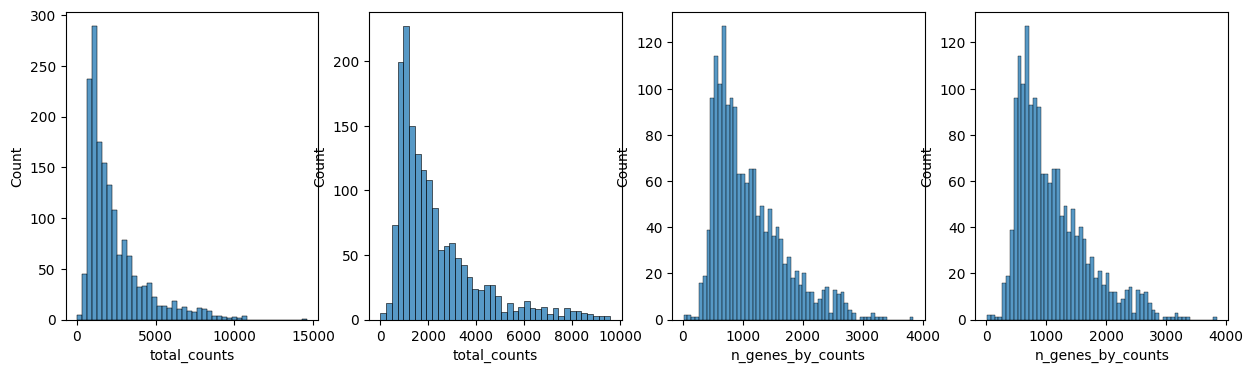

In [20]:
#checking the data quality
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0]) #total_counts : 세포당 발현된 모든 유전자 발현 값의 합
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2]) #n_genes_by_counts : 세포에서 발현된 유전자의 개수.
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [ ]:
## you can adjust the number of cells after checking the plot

# sc.pp.filter_cells(adata, min_counts=5000)
# sc.pp.filter_cells(adata, max_counts=35000)
# adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
# print(f"#cells after MT filter: {adata.n_obs}")
# sc.pp.filter_genes(adata, min_cells=10)

total_counts : 세포당 발현된 모든 유전자 발현 값의 합
- 너무 낮은 total counts: 데이터에 노이즈가 많거나 빈 세포(바코드 오류)일 가능성.
-너무 높은 total counts: 이중세포(doublet)일 가능성.

In [21]:
#Normlizaing
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

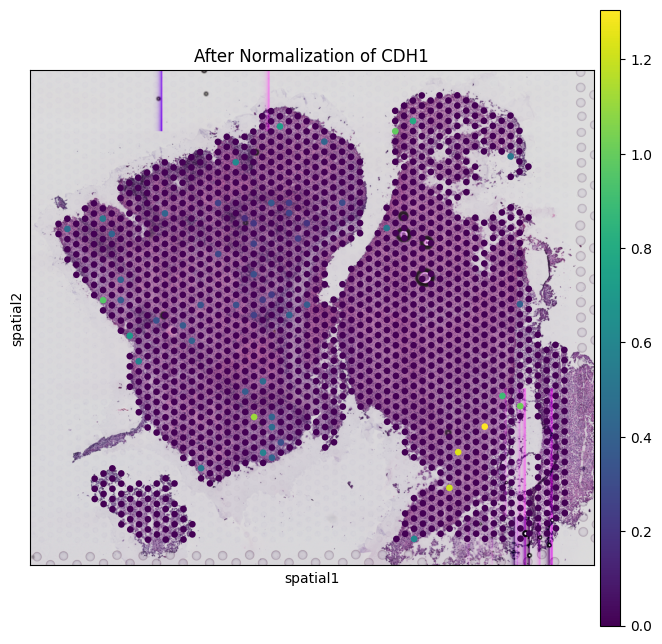

In [22]:
#feature mapping
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["CDH1"], title = 'After Normalization of CDH1')

##2-3. cell2location

: Using Cell2location for deconvolution

In [24]:
# loading the output of cell2location
Cell2Out = sc.read_h5ad('./Spatial-TENET/Test_Data/Input/Pre/Spa-Visium/GSM6177612_NYU_LIHC1_Vis_Cell2loc.h5ad')

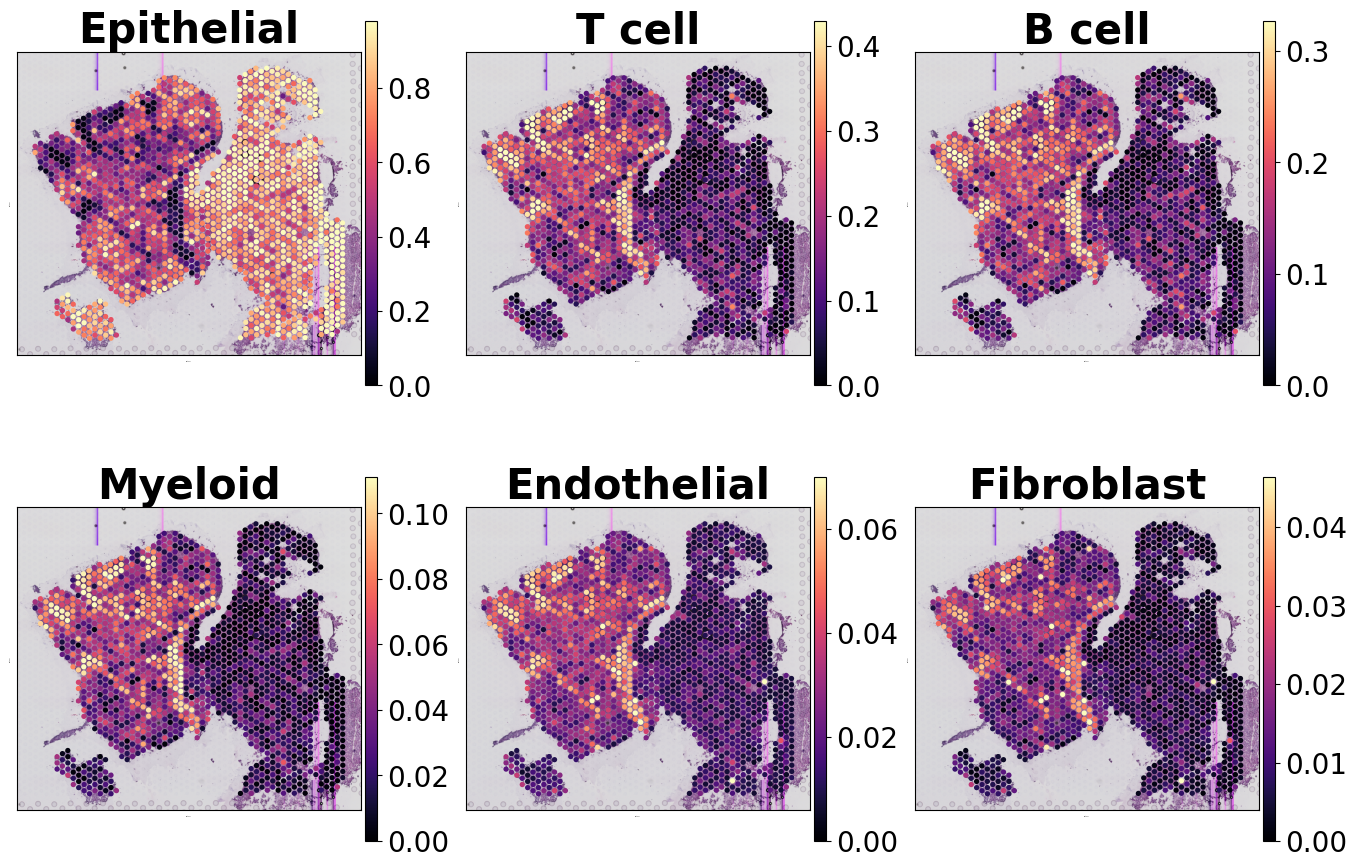

In [25]:
import matplotlib as mpl

# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor': 'black',
             'figure.figsize': [4.5, 5],
             'axes.titlesize': 30,
             'axes.titleweight': 'bold',
             'axes.labelsize' : 0,
             'ytick.labelsize' : 20
            }):
    sc.pl.spatial(Cell2Out, cmap='magma',
                  color=['Epithelial', 'T cell', 'B cell', 'Myeloid', 'Endothelial', 'Fibroblast'], ## comparing Cell-types
                  ncols=3, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',#vmax=0.6
                 )

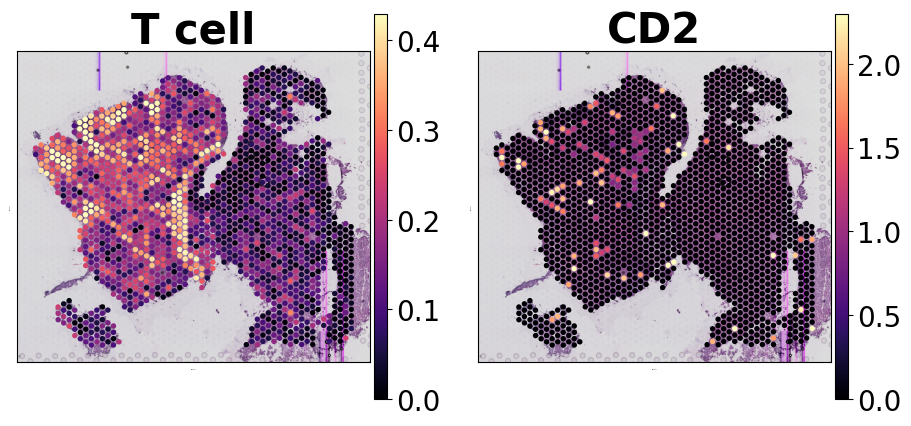

In [26]:
# plot in spatial coordinates
with mpl.rc_context({'axes.facecolor': 'black',
             'figure.figsize': [4.5, 5],
             'axes.titlesize': 30,
             'axes.titleweight': 'bold',
             'axes.labelsize' : 0,
             'ytick.labelsize' : 20
            }):
    sc.pl.spatial(Cell2Out, cmap='magma',
                  color=['T cell','CD2'], ## comparing Cell-type and bio-marker
                  ncols=3, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',#vmax=0.6
                 )

##2-4 cottrazm

**cottrazm**

- https://github.com/Yelab2020/Cottrazm

![overview_image](https://github.com/Yelab2020/Cottrazm/blob/main/doc/github%20figure1.png)



Cottrazm (**Co**nstruct **T**umor **Tra**nsition **Z**one (Boundary) **M**icroenvironment based on spatial transcriptomics) aims to construct the microenvironment of tumor boundary based on spatial transcriptomics, single-cell transcriptomics and HE-stained histological images. It consists of three core functions: determining the tumor boundary (Cottrazm-BoundaryDefine), deconvoluting spatial transcriptomics (Cottrazm-SpatialDecon), and reconstructing a spatial gene expression matrix for sub-spots (Cottrazm-SpatialRecon).

Taken together, Cottrazm provides an integrated tool framework to dissect the tumor spatial microenvironment and facilitates the discovery of functional biological insights, thereby identifying therapeutic targets in oncologic ST datasets.



##2-5.Generating input for spatial-tenet

###Loading the Datasets.

In [27]:
## loading cell2location result.
gsm_cell  = pd.read_csv('./Spatial-TENET/Test_Data/Input/Pre/Dataset/GSM6177612_NYU_LIHC1_Vis_merged.csv')
display(gsm_cell)

array_row  array_col  Fibroblast     B_cell  Epithelial     T_cell  \
0            59         19    0.828236   7.754887   47.126454   9.584251   
1            73         43    0.107171   1.012218   50.579383   1.103540   
2            42         28    1.170670  12.055927   32.968968  14.886258   
3            52         42    0.611396   6.513326   48.055637   8.204261   
4            65         83    0.238738   2.765433   45.934273   3.167868   
...         ...        ...         ...        ...         ...        ...   
1630         76         30    0.103184   0.478885   60.885733   0.506331   
1631         58         42    0.187510   3.417429   27.447331   3.651735   
1632         60         30    0.080077   0.814766   49.919202   0.942567   
1633         45         27    1.428021  17.055923   57.394279  21.310168   
1634         73         41    0.249806   2.268303   54.843655   2.643113   

       Myeloid  Endothelial  
0     2.041562     1.453996  
1     0.241767     0.427320  
2     3.324953     1.989180  
3     1.674366     1.366895  
4     0.660662     0.705193  
...        ...          ...  
1630  0.142145     0.492197  
1631  0.645687     0.489103  
1632  0.177481     0.374169  
1633  5.078304     3.133240  
1634  0.515245     0.683917  

[1635 rows x 8 columns]

In [ ]:
## loading expression(count) data.
gsm_visium=pd.read_csv("./Spatial-TENET/Test_Data/Input/Pre/Dataset/GSM6177612_NYU_LIHC1_Vis_counts.csv")
display(gsm_visium)

Barcode  array_row  array_col  A1BG  A2M  A4GALT  \
0     GSM6177612@AAACACCAATAACTGC-1         59         19     1    0       0   
1     GSM6177612@AAACAGTGTTCCTGGG-1         73         43     2    2       0   
2     GSM6177612@AAACCGGGTAGGTACC-1         42         28     0    1       0   
3     GSM6177612@AAACCGTTCGTCCAGG-1         52         42     6    3       0   
4     GSM6177612@AAACCTAAGCAGCCGG-1         65         83     2    0       0   
...                             ...        ...        ...   ...  ...     ...   
1630  GSM6177612@TTGTTGGCAATGACTG-1         76         30     3    1       0   
1631  GSM6177612@TTGTTTCACATCCAGG-1         58         42     3    0       0   
1632  GSM6177612@TTGTTTCATTAGTCTA-1         60         30     5    1       0   
1633  GSM6177612@TTGTTTCCATACAACT-1         45         27    26   14       0   
1634  GSM6177612@TTGTTTGTATTACACG-1         73         41     3    0       0   

      AAAS  AACS  AAGAB  AAK1  ...  ZSWIM6  ZSWIM7  ZSWIM8  ZW10  ZWILCH  \
0        0     0      0     0  ...       0       0       0     0       0   
1        0     0      0     0  ...       0       0       0     0       0   
2        0     0      0     0  ...       0       0       0     0       0   
3        0     0      0     0  ...       0       0       0     0       0   
4        0     0      0     0  ...       0       0       0     0       0   
...    ...   ...    ...   ...  ...     ...     ...     ...   ...     ...   
1630     0     0      0     0  ...       0       0       0     0       0   
1631     0     0      0     0  ...       0       0       0     0       0   
1632     0     0      0     0  ...       0       0       0     0       0   
1633     0     0      0     0  ...       0       0       0     0       0   
1634     0     0      0     0  ...       0       0       0     0       0   

      ZWINT  ZXDC  ZYG11B  ZYX  ZZEF1  
0         0     0       0    0      0  
1         0     0       0    0      0  
2         0     0       0    0      0  
3         0     0       0    0      0  
4         0     0       0    0      0  
...     ...   ...     ...  ...    ...  
1630      0     0       0    0      0  
1631      0     0       0    0      0  
1632      0     0       0    0      0  
1633      0     0       0    2      0  
1634      0     0       0    0      0  

[1635 rows x 9951 columns]

In [ ]:
## loading cottrazm data.
gsm_cot=pd.read_csv("./Spatial-TENET/Test_Data/Input/Pre/Dataset/GSM6177612_NYU_LIHC1_Vis_Malignancy.csv")
display(gsm_cot)

Barcode  cnv_score Malignancy
0     GSM6177612@AAACACCAATAACTGC-1        959        Bdy
1     GSM6177612@AAACAGTGTTCCTGGG-1        959        Bdy
2     GSM6177612@AAACCGGGTAGGTACC-1        959     Normal
3     GSM6177612@AAACCGTTCGTCCAGG-1        634        Bdy
4     GSM6177612@AAACCTAAGCAGCCGG-1        959        Bdy
...                             ...        ...        ...
1630  GSM6177612@TTGTTGGCAATGACTG-1       1080        Mal
1631  GSM6177612@TTGTTTCACATCCAGG-1        634        Bdy
1632  GSM6177612@TTGTTTCATTAGTCTA-1        921     Normal
1633  GSM6177612@TTGTTTCCATACAACT-1        634     Normal
1634  GSM6177612@TTGTTTGTATTACACG-1       1080        Mal

[1635 rows x 3 columns]

In [ ]:
#merging and generating cell_type and other columns

merged_df = pd.merge(gsm_visium.iloc[:,],  gsm_cot.iloc[:,[0,2]], on='Barcode', how='left')

In [ ]:
merged_df

Barcode  array_row  array_col  A1BG  A2M  A4GALT  \
0     GSM6177612@AAACACCAATAACTGC-1         59         19     1    0       0   
1     GSM6177612@AAACAGTGTTCCTGGG-1         73         43     2    2       0   
2     GSM6177612@AAACCGGGTAGGTACC-1         42         28     0    1       0   
3     GSM6177612@AAACCGTTCGTCCAGG-1         52         42     6    3       0   
4     GSM6177612@AAACCTAAGCAGCCGG-1         65         83     2    0       0   
...                             ...        ...        ...   ...  ...     ...   
1630  GSM6177612@TTGTTGGCAATGACTG-1         76         30     3    1       0   
1631  GSM6177612@TTGTTTCACATCCAGG-1         58         42     3    0       0   
1632  GSM6177612@TTGTTTCATTAGTCTA-1         60         30     5    1       0   
1633  GSM6177612@TTGTTTCCATACAACT-1         45         27    26   14       0   
1634  GSM6177612@TTGTTTGTATTACACG-1         73         41     3    0       0   

      AAAS  AACS  AAGAB  AAK1  ...  ZSWIM7  ZSWIM8  ZW10  ZWILCH  ZWINT  ZXDC  \
0        0     0      0     0  ...       0       0     0       0      0     0   
1        0     0      0     0  ...       0       0     0       0      0     0   
2        0     0      0     0  ...       0       0     0       0      0     0   
3        0     0      0     0  ...       0       0     0       0      0     0   
4        0     0      0     0  ...       0       0     0       0      0     0   
...    ...   ...    ...   ...  ...     ...     ...   ...     ...    ...   ...   
1630     0     0      0     0  ...       0       0     0       0      0     0   
1631     0     0      0     0  ...       0       0     0       0      0     0   
1632     0     0      0     0  ...       0       0     0       0      0     0   
1633     0     0      0     0  ...       0       0     0       0      0     0   
1634     0     0      0     0  ...       0       0     0       0      0     0   

      ZYG11B  ZYX  ZZEF1  Malignancy  
0          0    0      0         Bdy  
1          0    0      0         Bdy  
2          0    0      0      Normal  
3          0    0      0         Bdy  
4          0    0      0         Bdy  
...      ...  ...    ...         ...  
1630       0    0      0         Mal  
1631       0    0      0         Bdy  
1632       0    0      0      Normal  
1633       0    2      0      Normal  
1634       0    0      0         Mal  

[1635 rows x 9952 columns]

###Selecting and cropping spatial image

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.callbacks import Points
from ipywidgets import Output, Button, VBox
from IPython.display import display


In [ ]:
# Create a scatter plot using plotly
fig = px.scatter(
    merged_df, x='array_col', y='array_row', color='Malignancy',
    title="Select interesting region and Press the finalizing button",width=800, height=600
)

fig.update_layout(
    dragmode='lasso',  # Enable lasso selection
    title_x=0.5
)

# Create an Output widget to capture and display selected data
out = Output()
selected_data_storage = None  # Variable to store selected data

# Function to handle selection events
def handle_selection(trace, points, selector):
    global selected_data_storage
    selected_indices = points.point_inds
    if len(selected_indices) > 0:
        selected_data = data.iloc[selected_indices]
        selected_data_storage = selected_data  # Save the selected data
        with out:
            out.clear_output()
            print("Selected Data:")
            display(selected_data)

# Add selection handler to each trace
for trace in fig.data:
    trace.on_selection(handle_selection)

# Create a button to finalize selection and save data
save_button = Button(description="Finalize Selection")

# Function to handle button click events
def handle_finalize_selection(button):
    global selected_data_storage
    if selected_data_storage is not None:
        with out:
            out.clear_output()
            print("Finalized Selected Data:")
            display(selected_data_storage)
    else:
        with out:
            out.clear_output()
            print("No data selected. Please select points first.")

save_button.on_click(handle_finalize_selection)

# Display the plot
display(fig)

# Display the button and output widget
display(VBox([save_button, out]))


###Mini-test set for today.

In [ ]:
testfile = pd.read_csv('./Spatial-TENET/Test_Data/Input/GeneToGene/Test.csv')
display(testfile)

array_row  array_col  APOC1  COL18A1  HSD11B1  CD81  TSC22D3  HNRNPK  \
0            59         19     16        0        0     0        1       0   
1            73         43     21        3        0     1        1       0   
2            42         28     24        1        1     0        1       0   
3            52         42     34        3        2     1        1       0   
4            65         83     24        1        0     0        0       1   
...         ...        ...    ...      ...      ...   ...      ...     ...   
1630         76         30    119        3        5     0        2       0   
1631         58         42     24        1        3     0        0       0   
1632         60         30     18        2        2     0        2       0   
1633         45         27     90        4        4     1        2       5   
1634         73         41     45        1        5     3        2       1   

      DDX17  TM9SF2  OCIAD2  PKD2  gene_x  gene_y  gene_z  
0         0       0       0     0       4       5       0  
1         0       0       0     0      19       0       0  
2         1       0       0     0      14      10       7  
3         1       0       0     0      13       0       5  
4         0       0       0     0      10       8       1  
...     ...     ...     ...   ...     ...     ...     ...  
1630      0       1       0     0      16       2       0  
1631      0       0       0     0       4       0       1  
1632      0       1       0     0      10       0       0  
1633      3       1       0     0      25       4       9  
1634      0       1       0     0      25       0       1  

[1635 rows x 15 columns]

In [ ]:
def plotting_by_distribution(data, types, num_cols_input=4):
    num_plots = len(types)
    num_cols = min(num_plots, num_cols_input)
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), dpi=200)
    axs = np.array(axs).reshape(-1)  # converting to 1-dim

    for i, type in enumerate(types):
        #subset
        subset = data[['array_row', 'array_col', type]]

        # drawing scatter plot
        scatter = axs[i].scatter(subset['array_row'], subset['array_col'], c=subset[type], cmap='viridis', s=20)
        axs[i].set_title(f'{type} Distribution')
        axs[i].set_xlabel('Array Column')
        axs[i].set_ylabel('Array Row')

        # adding color-bar
        fig.colorbar(scatter, ax=axs[i], label='Proportion')

    # delete un-used axis
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

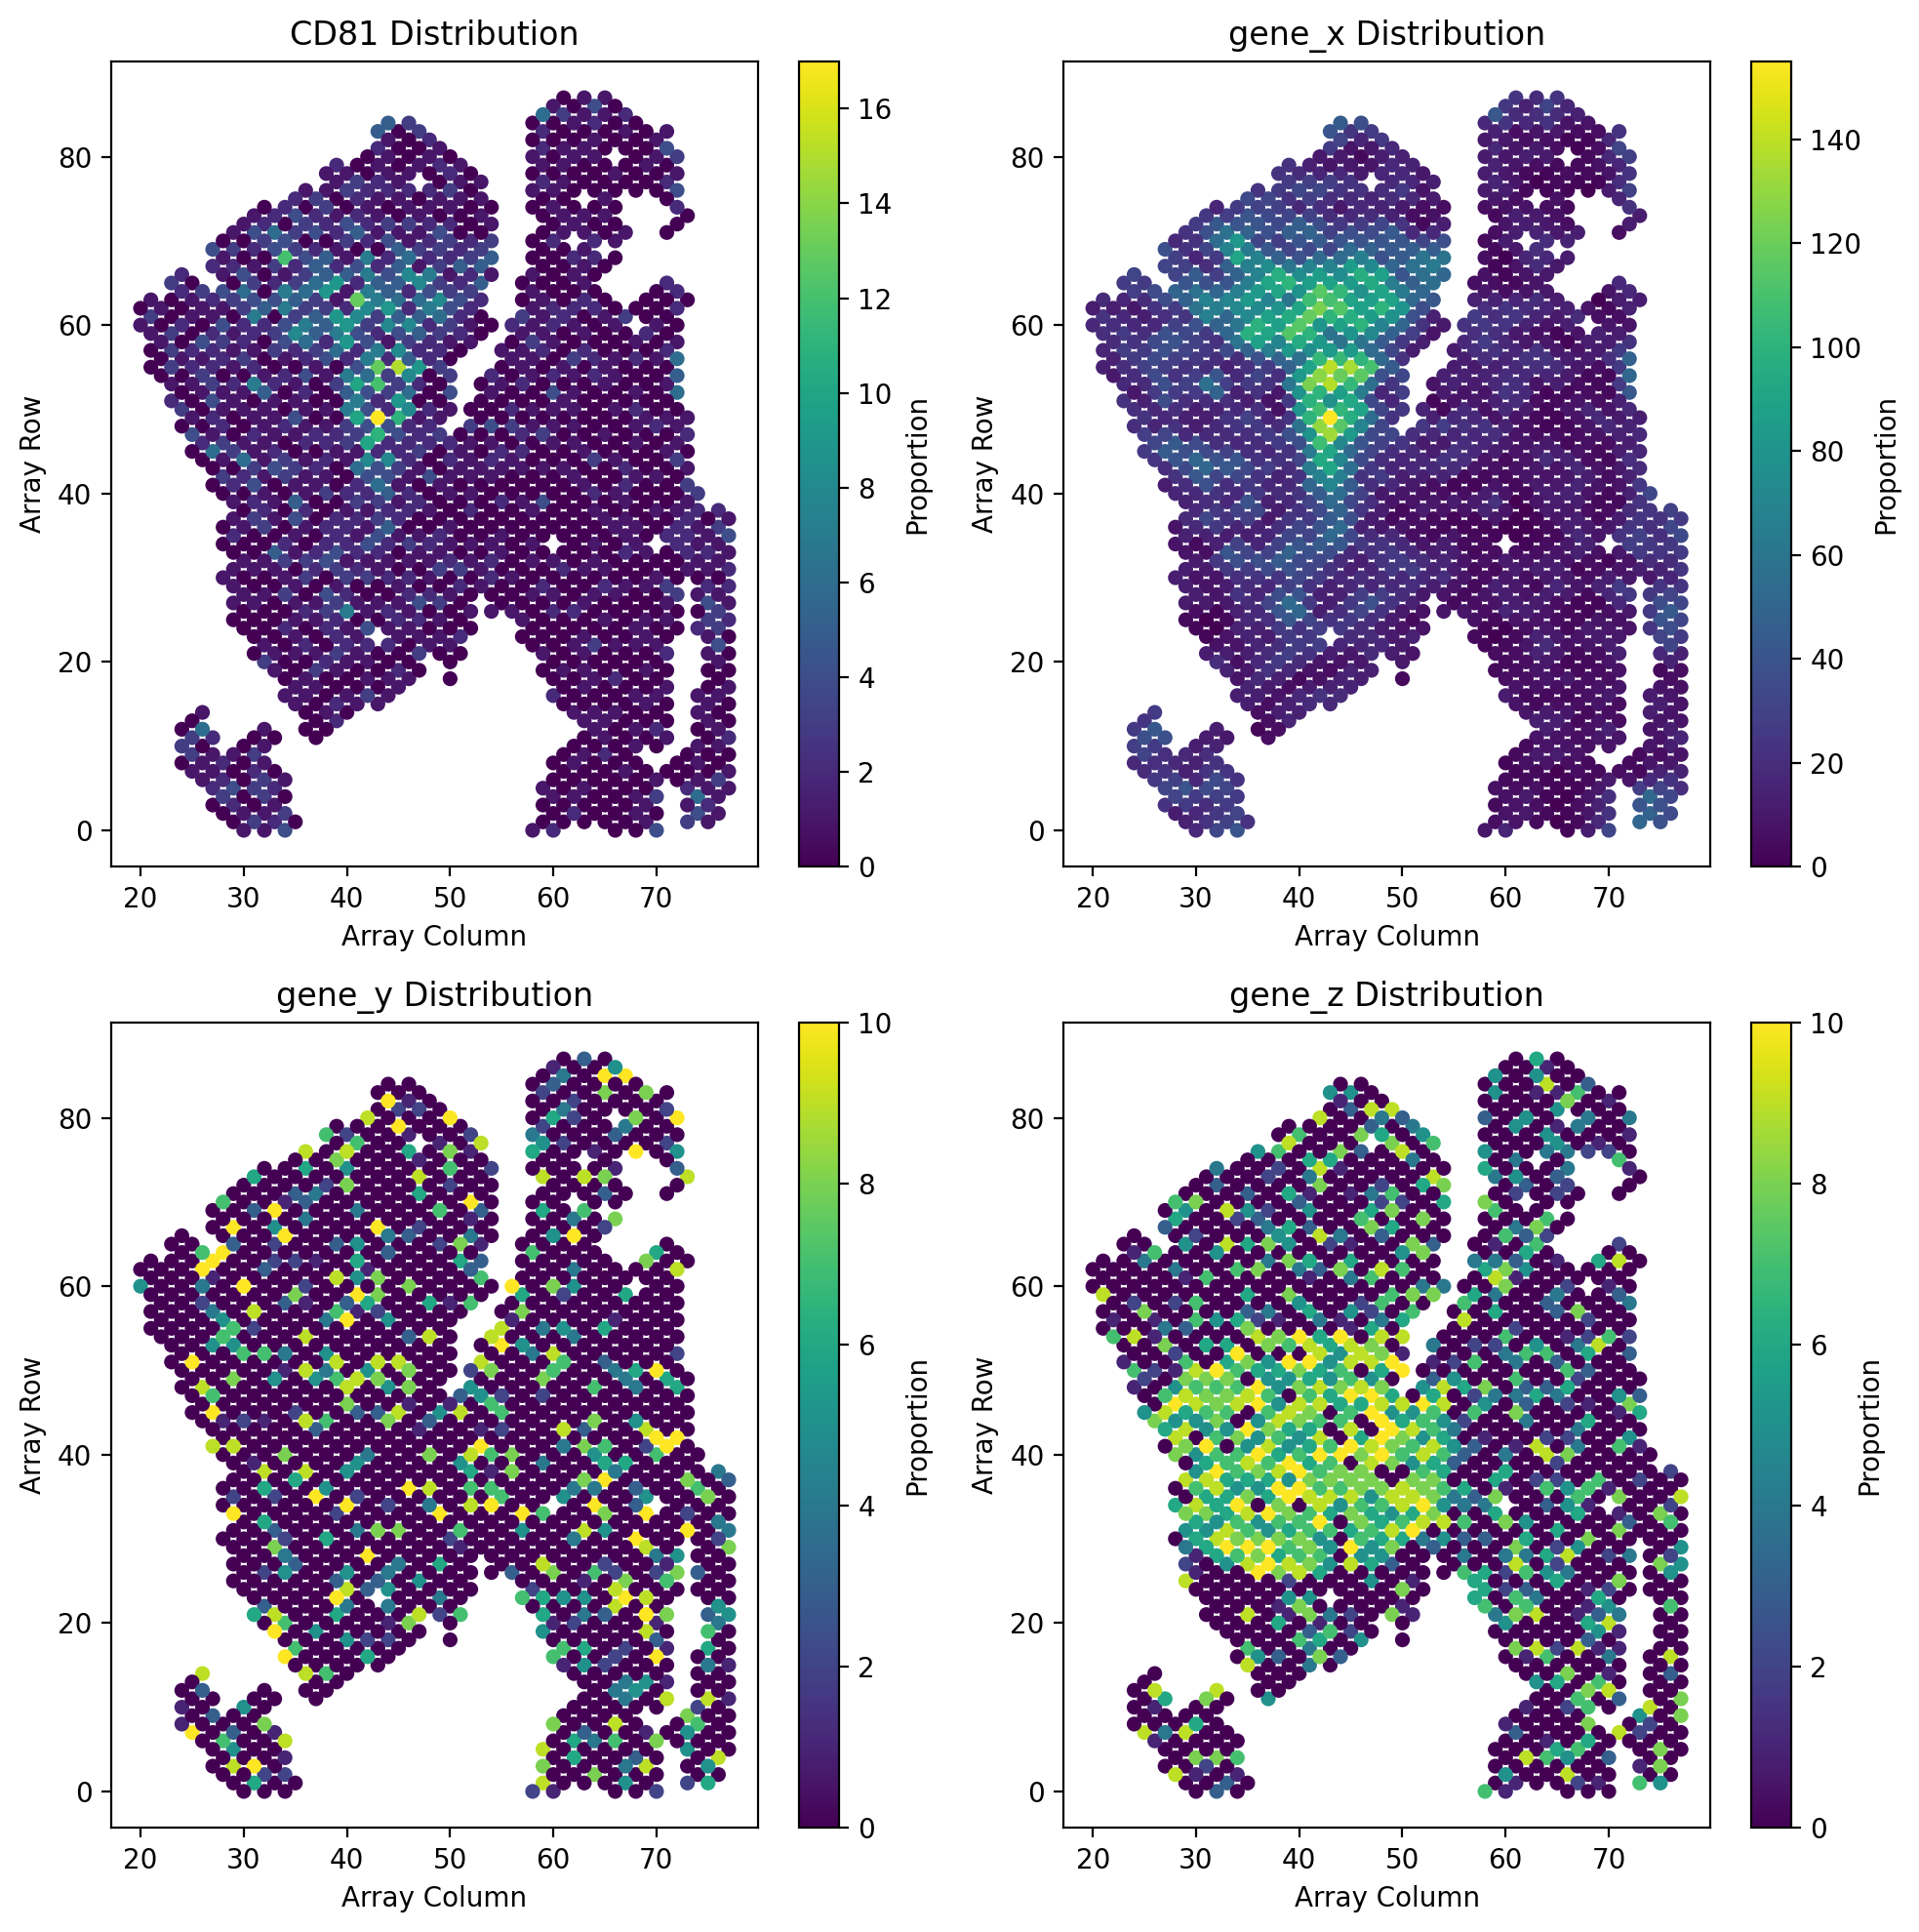

In [ ]:
gene_lists=['CD81','gene_x','gene_y','gene_z']
plotting_by_distribution(testfile, gene_lists, num_cols_input=2)

#3.Running Spa-TENET

##3-1. Understanding Spa-TENET strategy
01. Cell to Gene
02. Gene to Gene

##3-2.Configuring arguments and parameters

| Short Option | Long Option               | Description                                                          | Default        |
|--------------|---------------------------|----------------------------------------------------------------------|----------------|
| `-f`         | `--file_path FILE_PATH`   | Path to the spatial data for input (CSV format).                     | Required       |
| `-o`         | `--output_path OUTPUT_PATH`| Path to save the output.                                             | Required       |
| `-l`         | `--Type_Level TYPE_LEVEL` | Specify causality: `'c'` (Cell to Gene) or `'g'` (Gene to Gene).     | Required       |
| `-g`         | `--gene_col GENE_COL`     | Start column index of gene.                                          | `2`            |
| `-m`         | `--neighbors NEIGHBORS`   | Number of neighbors to consider.                                     | `6`            |
| `-s`         | `--symbolizing SYMBOLIZING`| How to symbolize raw data: `1` (median), `2` (quantile).             | `1`            |
| `-b`         | `--bootstrap BOOTSTRAP`   | Number of bootstrapping iterations.                                  | `199`          |
| `-sf`        | `--suffix SUFFIX`         | Suffix for output files.                                             | `'causality'`  |

---

### Notes:
- All required arguments must be specified when executing the script.
- The default values for optional parameters can be overridden as needed.

##3-3.Executing the Spa-TENET workflow

In [ ]:
!python ./Spatial-TENET/run.py -f ./Spatial-TENET/Test_Data/Input/GeneToGene/ -o ./Spatial-TENET/Test_Data/Output/GeneToGene/ -l g -g 2 -m 6 -s 2 -b 199 -sf Spa-Tenet_

****** CALCULATION COMPLETE ******
Total execution time:  5.412101745605469e-05 seconds


#4.Output and Analysis



##4-1. Interpreting results: Gene-to-Gene analysis

In [ ]:
## getting output of spa-tenet

def process_spatial_tenet_results(file_path):
    """
    Args:
        file_path (str): Spatial TENET 결과 파일의 경로.

    Returns:
        pd.DataFrame: 'cau' 값이 1인 경우만 필터링한 후, 'X', 'Y', 'XtoY' 열로 구성된 DataFrame을 반환.

    Notes:
        - 'X'는 영향을 주는 유전자입니다.
        - 'Y'는 영향을 받는 유전자입니다.
        - 'XtoY'는 X가 Y에 주는 entropy 값으로, 영향의 강도를 나타냅니다.
        - 'length'는 입력 데이터에서 사용된 spot의 개수입니다.
        - 'm'은 알고리즘에서 설정하는 Neighbor의 수를 나타냅니다.
        - 'XtoYpvalue'와 'YtoXpvalue'는 causality 관계가 있는지 여부를 나타내기 위한 p-value 정보입니다.
        - 'cau'가 1이면 X가 Y에게 영향을 준다는 것을 의미합니다.
    """
    # Reading the file
    spatial_tenet_output = pd.read_csv(file_path)

    # Setting column name
    spatial_tenet_output.columns = ['X', 'Y', 'XtoY', 'length', 'm', 'XtoYpvalue', 'YtoXpvalue', 'cau']

    # Filtering only data with 'cau' value of 1
    filtered_output = spatial_tenet_output[spatial_tenet_output['cau'] == 1]

    # Selecting "X", "Y", and "XtoY"
    final_output = filtered_output[['X', 'Y', 'XtoY']]

    return final_output

In [ ]:
#Running example

SpaTenet_path = "./Spatial-TENET/Test_Data/Output/GeneToGene/Spa-Tenet_Test.csv"
result = process_spatial_tenet_results(SpaTenet_path)

In [ ]:
def plot_top_Causal_and_Affected_gene(data, top_n=10):
    """
    result에서 Causal gene(영향을 주는 유전자)과 Affected gene(영향을 받는 유전자)의 빈도수를 계산하여
    상위 N개의 유전자에 대한 시각화를 수행하는 함수입니다.

    Args:
        data (pd.DataFrame): 'X', 'Y', 'XtoY' 열이 포함된 DataFrame입니다.
                             - 'X': 영향을 주는 유전자 (Causal gene).
                             - 'Y': 영향을 받는 유전자 (Affected gene).
        top_n (int): 상위 유전자의 개수를 지정합니다. 기본값은 10입니다.

    Returns:
        None: 히스토그램을 생성하고 화면에 출력합니다.

    Notes:
        - 'Causal gene'은 다른 유전자에게 영향을 많이 주는 유전자의 빈도를 나타냅니다 (X열).
        - 'Affected gene'은 다른 유전자로부터 영향을 많이 받는 유전자의 빈도를 나타냅니다 (Y열).
        - 상위 N개의 유전자를 기준으로 수평 막대 그래프를 생성합니다.
        - 첫 번째 그래프는 Causal gene (가장 많이 영향을 주는 유전자)입니다.
        - 두 번째 그래프는 Affected gene (가장 많이 영향을 받는 유전자)입니다.
    """
    # Causal gene (영향을 주는 유전자): Calculate frequency in column X and select top N
    causal_counts = data['X'].value_counts().head(top_n)


    # Affected gene (영향을 받는 유전자): Calculate frequency in column Y and select top N
    affected_counts = data['Y'].value_counts().head(top_n)


    causal_counts = causal_counts.sort_values(ascending=True)
    affected_counts = affected_counts.sort_values(ascending=True)

    plt.figure(figsize=(4, 5))
    causal_counts.plot(kind='barh')
    plt.title(f"Top {len(causal_counts)} Causal Genes")
    plt.xlabel("Frequency")
    plt.ylabel("Causal Genes")
    plt.tight_layout()
    plt.show()

    # Generating Affected gene (가장 많이 영향을 받는 유전자) Histogram plot.
    plt.figure(figsize=(4, 5))
    affected_counts.plot(kind='barh')
    plt.title(f"Top {len(affected_counts)} Affected Genes")
    plt.xlabel("Frequency")
    plt.ylabel("Affected Genes")
    plt.tight_layout()
    plt.show()



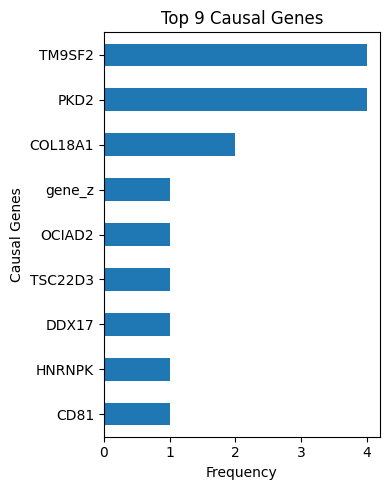

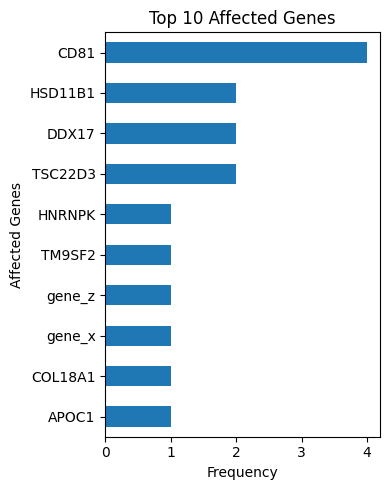

In [ ]:
plot_top_Causal_and_Affected_gene(result)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_heatmap_with_clustering(result, top_n=40):
    """
    XtoY 값이 큰 상위 N개의 데이터를 기반으로 hierarchical clustering을 적용한 히트맵을 생성합니다.
    (X축: Causal Genes, Y축: Affected Genes).

    Parameters:
        result (pd.DataFrame): 'X', 'Y', 'XtoY' 열이 포함된 DataFrame.
        top_n (int): 히트맵에 표시할 상위 N개의 데이터.
    """
    # Selecting top_n by XtoY column
    top_df = result.nlargest(top_n, 'XtoY')

    # Generating pivot-table (X: column, Y: row, XtoY: value)
    pivot_table = top_df.pivot(index='Y', columns='X', values='XtoY').fillna(0)

    # Generating Hierarchical Clustering Heatmap
    sns.clustermap(
        pivot_table,
        cmap="viridis",
        method="average",
        metric="euclidean",
        linewidths=0.5,
        figsize=(12, 10),
        cbar_kws={'label': 'Entropy Influence'}
    )
    plt.title(f"Top {len(pivot_table)} Entropy Heatmap with Clustering", fontsize=16)
    plt.show()


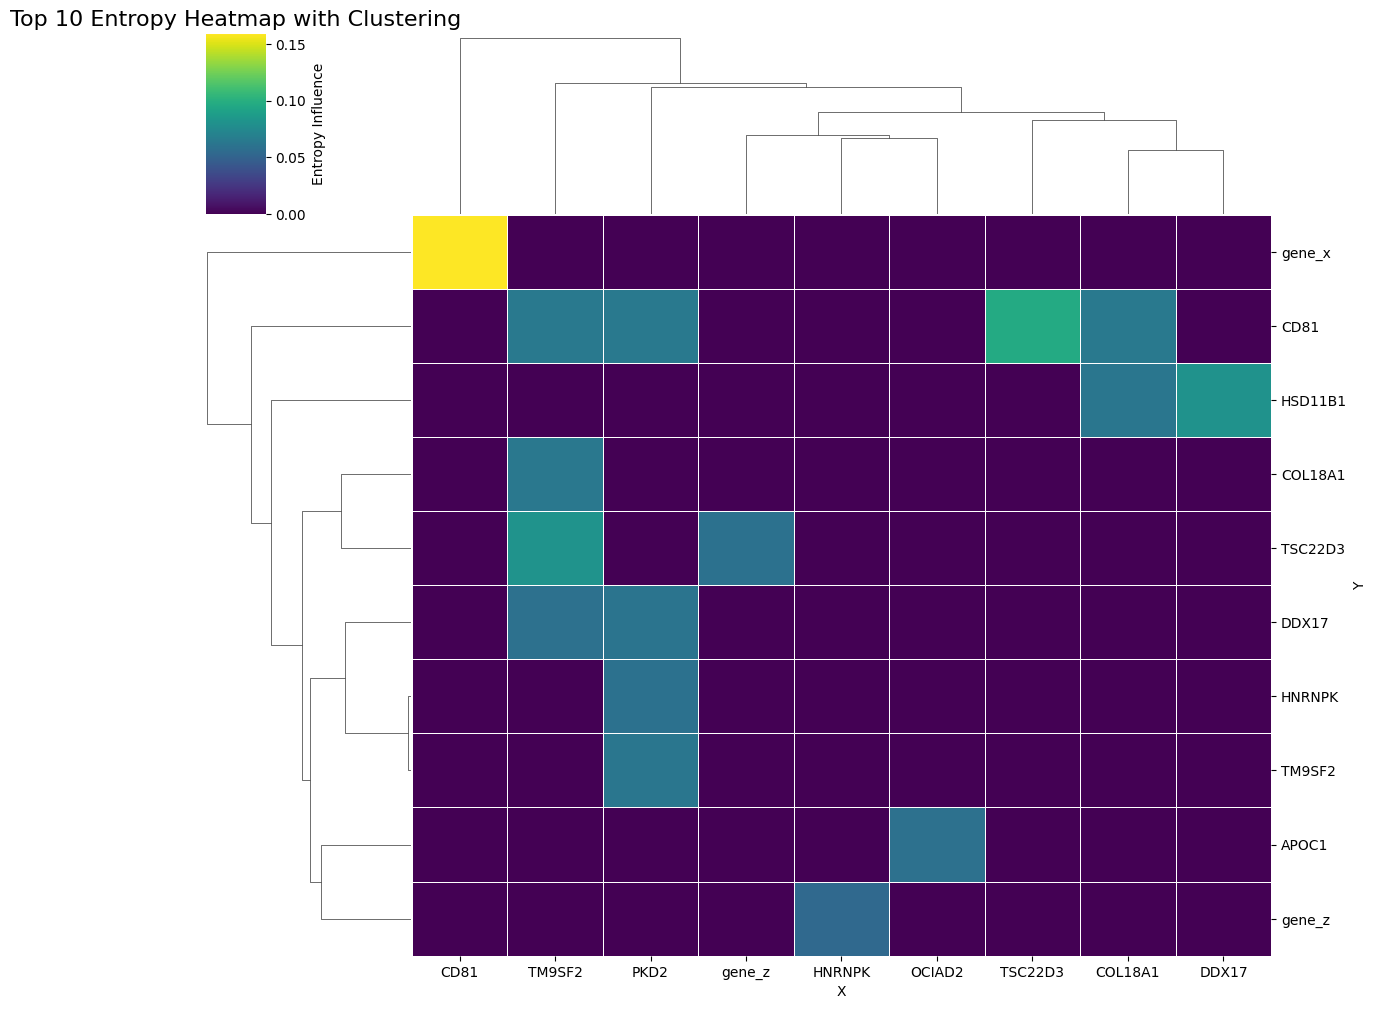

In [ ]:
create_heatmap_with_clustering(result, top_n=40)